In [101]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [102]:
# Loading Formula One Dataset
data = pd.read_csv('results.csv')

#### Starts off with Formula One dataset being loaded from the results.csv file listed on :

#### https://www.kaggle.com/cjgdev/formula-1-race-data-19502017#results.csv . 

#### It includes datapoints like driverId, positionOrder, points and fastestLap. 

In [103]:
# Display of variety of datapoints in "results.csv"
data.tail

<bound method NDFrame.tail of        resultId  raceId  driverId  constructorId  number  grid  position  \
0             1      18         1              1    22.0     1       1.0   
1             2      18         2              2     3.0     5       2.0   
2             3      18         3              3     7.0     7       3.0   
3             4      18         4              4     5.0    11       4.0   
4             5      18         5              1    23.0     3       5.0   
...         ...     ...       ...            ...     ...   ...       ...   
23772     23777     988       842              5    10.0    17      16.0   
23773     23778     988       828             15     9.0    19      17.0   
23774     23779     988       840              3    18.0    15      18.0   
23775     23780     988       832              4    55.0    12       NaN   
23776     23781     988       817              9     3.0     4       NaN   

      positionText  positionOrder  points  laps     time 

In [104]:
# Reducing the number of datapoints, dropping ones which wouldn't improve results. 
# Also clearing rows with any empty fields. 

data = data.drop(['resultId','constructorId','statusId','positionText','fastestLapTime','time','milliseconds', 'grid', 'number'], axis = 1)
data = data.dropna()
data = data[data.raceId < 900]

# Optional drop data = data[data.driverId < 200]
# Previous datapoints : data = data.drop(['resultId', 'constructorId', 'number','grid','positionText','positionOrder','fastestLap','fastestLapTime', 'fastestLapSpeed', 'statusId','points','laps','time','milliseconds'], axis = 1)




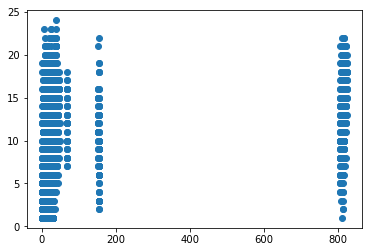

In [105]:
plt.scatter(data.driverId, data.position)

In [106]:
# Remaining rows after filtering through data
data.head


<bound method NDFrame.head of        raceId  driverId  position  positionOrder  points  laps  fastestLap  \
0          18         1       1.0              1    10.0    58        39.0   
1          18         2       2.0              2     8.0    58        41.0   
2          18         3       3.0              3     6.0    58        41.0   
3          18         4       4.0              4     5.0    58        58.0   
4          18         5       5.0              5     4.0    58        43.0   
...       ...       ...       ...            ...     ...   ...         ...   
22119     899       818      15.0             15     0.0    70        49.0   
22120     899       813      16.0             16     0.0    70        45.0   
22121     899       824      17.0             17     0.0    69        67.0   
22122     899       823      18.0             18     0.0    69        51.0   
22123     899       820      19.0             19     0.0    69        68.0   

       rank fastestLapSpeed  
0  

In [107]:
#X_train, X_test, y_train, y_test = train_test_split(data.driverId, data.position)
X_train, X_test, y_train, y_test = train_test_split(data.driverId, data.position, test_size=0.10)

In [108]:
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [110]:
# Logistic Regression Algorithm
lrmodel = LogisticRegression(max_iter=100000)


In [111]:
lrmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
lrmodel.score(X_test,y_test)

0.06389776357827476

In [113]:
lrmodel.predict_proba(X_test)

array([[9.25677415e-10, 1.59054844e-03, 1.94419286e-03, ...,
        2.82093916e-03, 7.27559641e-06, 5.68045217e-18],
       [9.39161141e-02, 7.26489598e-02, 7.27703240e-02, ...,
        3.52914800e-03, 2.24630949e-03, 2.39731649e-03],
       [9.39161141e-02, 7.26489598e-02, 7.27703240e-02, ...,
        3.52914800e-03, 2.24630949e-03, 2.39731649e-03],
       ...,
       [8.00885343e-02, 7.16102353e-02, 7.18715786e-02, ...,
        3.60499038e-03, 2.17264163e-03, 1.75767723e-03],
       [7.38818455e-02, 7.10231981e-02, 7.13527794e-02, ...,
        3.63976633e-03, 2.13451701e-03, 1.50348216e-03],
       [7.23996345e-02, 7.08701410e-02, 7.12165801e-02, ...,
        3.64814963e-03, 2.12487944e-03, 1.44575552e-03]])

In [114]:
lrmodel.predict([[15]])

array([4.])

## List of Top 20 F1 Racers, ranked by points since 1950

#### 1 United Kingdom Lewis Hamilton	250	84	39	28	151	88	47	3431
#### 2	Germany Sebastian Vettel	240	53	35	32	120	57	38	2985
#### 3	Spain Fernando Alonso	311	32	37	28	97	22	23	1899
#### 4	Finland Kimi Räikkönen	313	21	37	45	103	18	46	1854
#### 5	Germany Nico Rosberg	206	23	25	9	57	30	20	1594.5
#### 6	Germany Michael Schumacher	307	91	43	21	155	68	77	1566
#### 7	Finland Valtteri Bottas	139	7	22	16	45	11	13	1289
#### 8	United Kingdom Jenson Button	306	15	15	20	50	8	8	1235
#### 9	Brazil Felipe Massa	269	11	13	17	41	16	15	1167
#### 10	Australia Mark Webber	215	9	16	17	42	13	19	1047.5
#### 11	Australia Daniel Ricciardo	171	7	6	16	29	3	13	1040
#### 12	Netherlands Max Verstappen	102	8	11	12	31	2	7	948
#### 13	France Alain Prost	199	51	35	20	106	33	41	798.5
#### 14	Brazil Rubens Barrichello	322	11	29	28	68	14	17	658
#### 15	Brazil Ayrton Senna	161	41	23	16	80	65	19	614
#### 16	Mexico Sergio Pérez	176	0	2	6	8	0	4	580
#### 17	United Kingdom David Coulthard	246	13	26	23	62	12	18	535
#### 18	Germany Nico Hülkenberg	178	0	0	0	0	1	2	511
#### 19	Brazil Nelson Piquet	204	23	20	17	60	24	23	485.5
#### 20	United Kingdom Nigel Mansell	188	31	17	11	59	32	30	482

## List of Drivers by driverId, based on drivers.csv

#### 1	Lewis	Hamilton
#### 2	Nick	Heidfeld
#### 3	Nico	Rosberg
#### 4	Fernando	Alonso
#### 5	Heikki	Kovalainen
#### 6	Kazuki	Nakajima
#### 7	S̩bastien Bourdais
#### 8	Kimi	Raikk̦onen
#### 9	Robert	Kubica
#### 10	Timo	Glock
#### 11	Takuma	Sato
#### 12	Nelson	Piquet Jr.
#### 13	Felipe	Massa
#### 14	David	Coulthard
#### 15	Jarno	Trulli
#### 16	Adrian	Sutil
#### 17	Mark	Webber
#### 18	Jenson	Button
#### 19	Anthony	Davidson
#### 20	Sebastian	Vettel
#### 21	Giancarlo	Fisichella
#### 22	Rubens	Barrichello
#### 23	Ralf	Schumacher
#### 24	Vitantonio	Liuzzi
#### 25	Alexander	Wurz

In [115]:
# KNN Algorithm
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='brute')

In [116]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [117]:
knn.score(X_test,y_test)

0.43621787680886426

In [118]:
knn.predict([[1]])

array([5.])

In [119]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=20, random_state=0)
rforest.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [120]:
# So far, producing between 44 to 47% accuracy

rforest.score(X_test,y_test)

0.4512343195146199

In [121]:
rforest.predict([[4]])

array([3.94358192])